In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import tensorflow as tf
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [17]:
cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv("/Users/vidyanshsinha/Desktop/machine learning/SeoulBikeData.csv", encoding="ISO-8859-1").drop(["Date","Holiday","Seasons"],axis=1)
df.columns=cols
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)
cols=df.columns
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


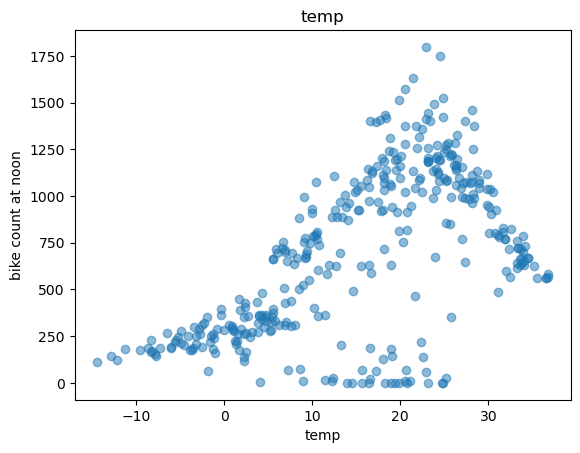

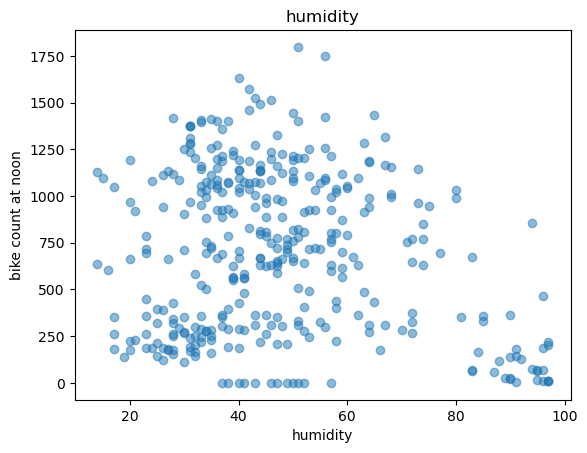

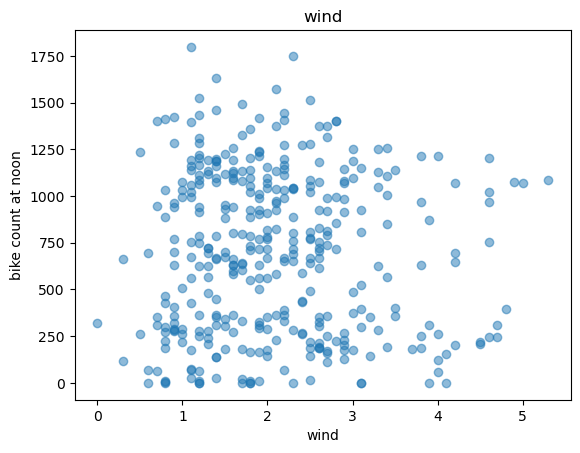

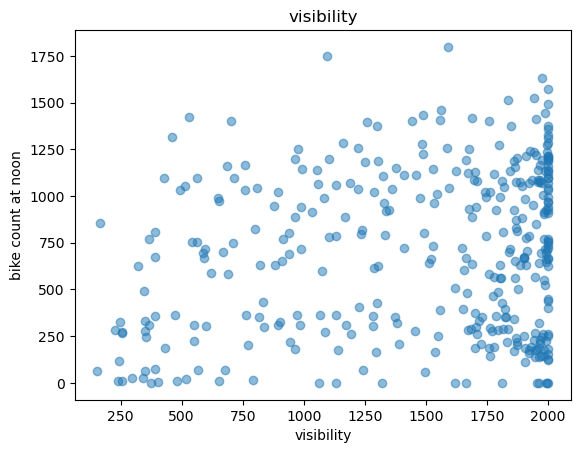

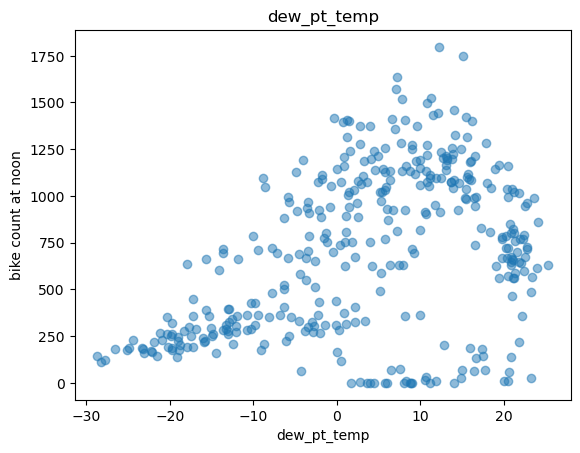

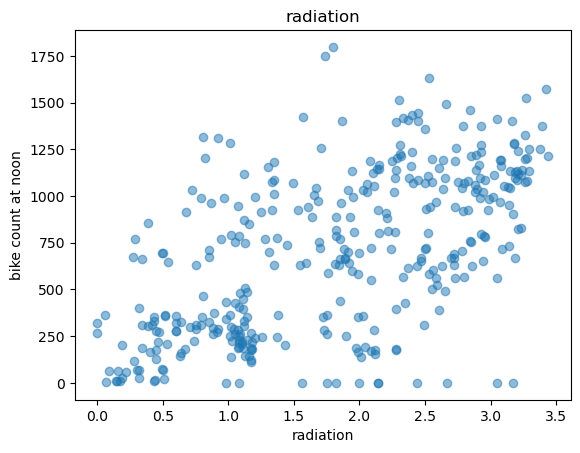

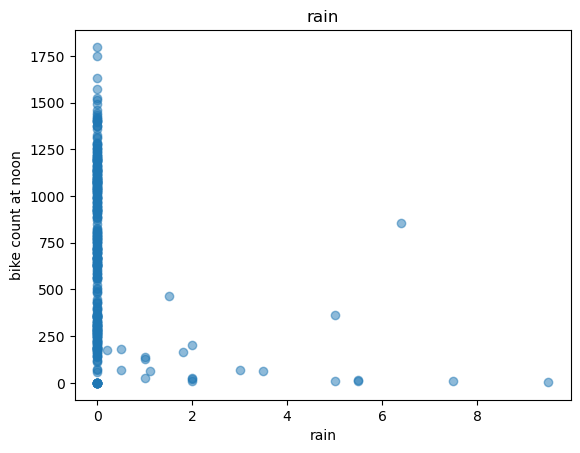

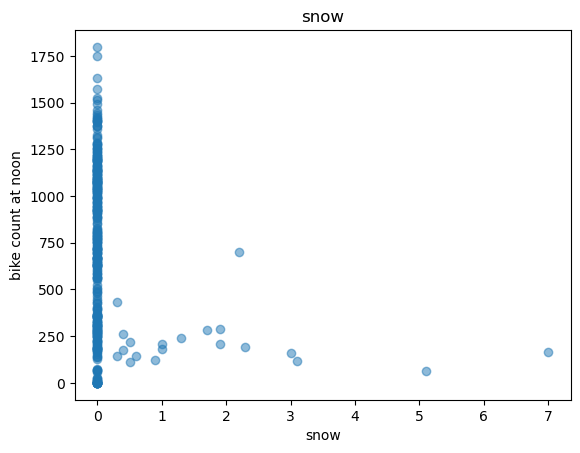

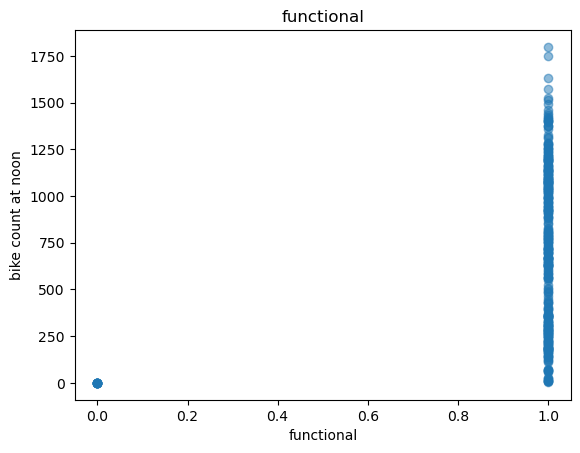

In [19]:
for label in cols[1:]:
    plt.scatter(df[label],df["bike_count"],alpha=0.5)
    plt.title(label)
    plt.ylabel("bike count at noon")
    plt.xlabel(label)
    plt.show()

In [20]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [21]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [23]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe=copy.deepcopy(dataframe)
    if x_labels is None:
        x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
              x=dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x=dataframe[x_labels].values
            
    y=dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((x,y))
    return data,x,y

In [27]:
_,x_temp_train,y_temp_train=get_xy(train,"bike_count",x_labels=["temp"])
_,x_temp_val,y_temp_val=get_xy(valid,"bike_count",x_labels=["temp"])
_,x_temp_test,y_temp_test=get_xy(test,"bike_count",x_labels=["temp"])

In [29]:
temp_reg=LinearRegression()
temp_reg.fit(x_temp_train,y_temp_train)

LinearRegression()

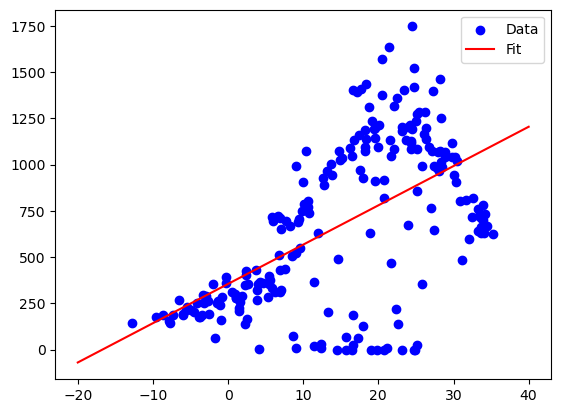

In [31]:
plt.scatter(x_temp_train,y_temp_train,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x.numpy().reshape(-1,1))),label="Fit",color="red")
plt.legend()
plt.show()

In [33]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df.columns))])
_,x_train_all,y_train_all=get_xy(train,"bike_count",x_labels=df.columns[1:])
_,x_val_all,y_val_all=get_xy(valid,"bike_count",x_labels=df.columns[1:])
_,x_test_all,y_test_all=get_xy(test,"bike_count",x_labels=df.columns[1:])


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [35]:
all_reg=LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [37]:
all_reg.score(x_test_all,y_test_all)

0.6060839056279337

## REGRESSION USING NN

In [42]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_temp_train.reshape(-1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)  
])


In [54]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [60]:

def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.title('Model Loss')
    plt.show()

In [ ]:
history= temp_nn_model.fit(
    x_temp_train,y_temp_train,
    verbose=0,
    epochs=1000,
    validation_data=(x_temp_val,y_temp_val)
)

2025-04-04 01:27:28.230115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-04 01:27:28.232954: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


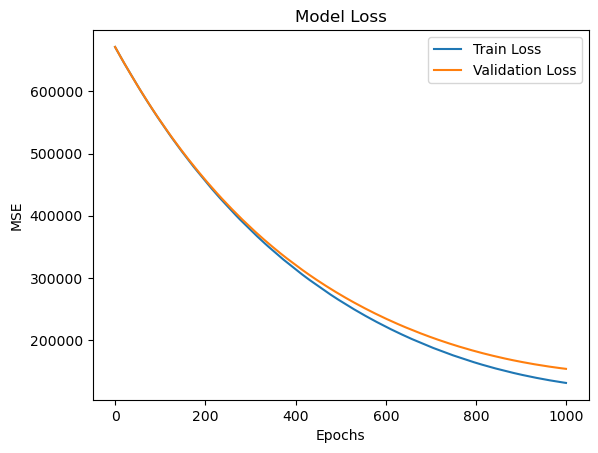

In [89]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


2025-04-04 01:33:52.812890: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


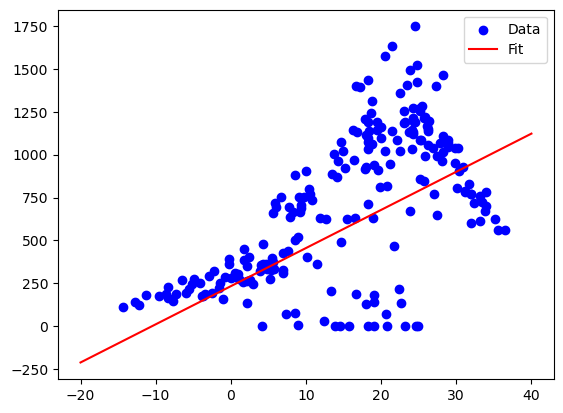

In [93]:
plt.scatter(x_temp_train,y_temp_train,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x.numpy().reshape(-1,1))),label="Fit",color="red")
plt.legend()
plt.show()

In [95]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_temp_train.reshape(-1))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)      
])

In [126]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')

In [128]:
history=nn_model.fit(
    x_temp_train,y_temp_train,
    verbose=0,epochs=100,
    validation_data=(x_temp_val,y_temp_val)
)

2025-04-04 01:54:46.871203: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


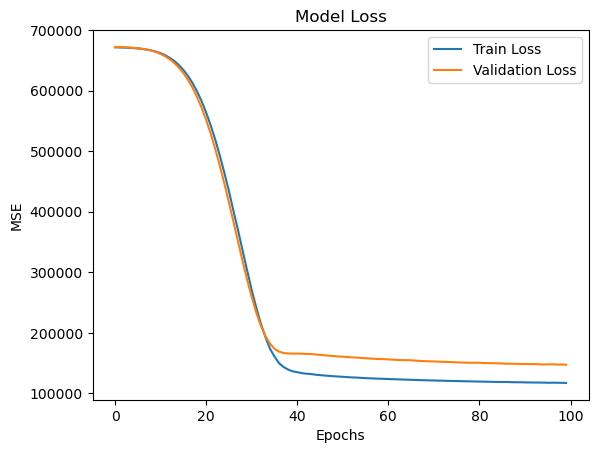

In [130]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


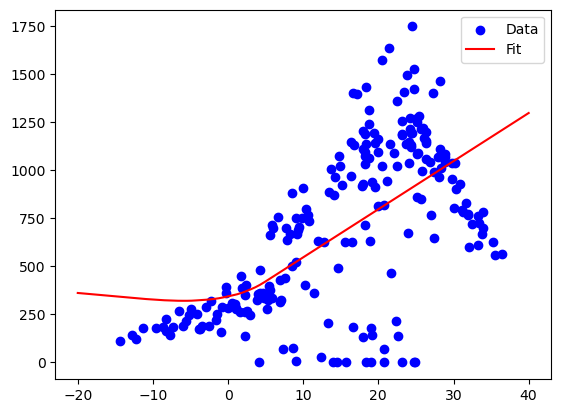

In [133]:
plt.scatter(x_temp_train,y_temp_train,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x.numpy().reshape(-1,1))),label="Fit",color="red")
plt.legend()
plt.show()

## EXAMPLE OF WELL FITTED NEURAL NETWORK

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-04 01:46:46.573477: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x321727f60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


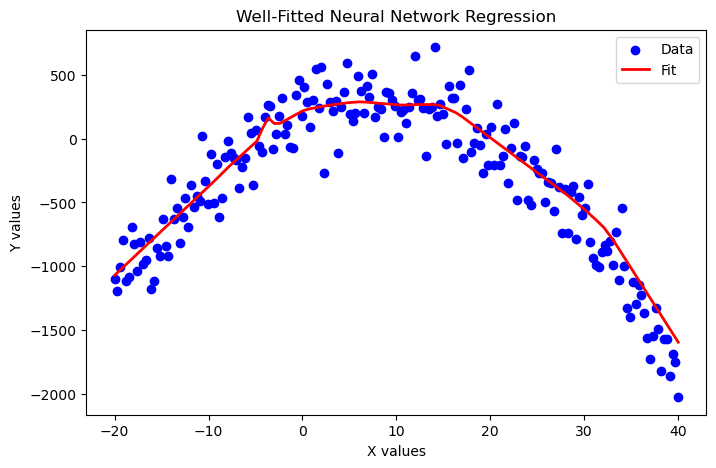

In [113]:
np.random.seed(42)
x_data = np.linspace(-20, 40, 200)
y_data = 200 + 30 * x_data - 2 * x_data**2 + np.random.normal(0, 200, 200)  # Quadratic trend with noise

# Normalize the data
x_train = x_data.reshape(-1, 1)
y_train = y_data.reshape(-1, 1)

# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=500, verbose=0)

# Predict on a fine-grained x range
x_test = np.linspace(-20, 40, 100).reshape(-1, 1)
y_pred = model.predict(x_test)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label="Data")  # Original data
plt.plot(x_test, y_pred, color='red', label="Fit", linewidth=2)  # Model fit
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.title("Well-Fitted Neural Network Regression")
plt.show()

In [120]:
all_normalizer=tf.keras.layers.Normalization(input_shape=(6,1),axis=-1)
all_normalizer.adapt(x_train_all)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [151]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(9,)),  # 9 features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
print(x_train_all.shape, y_train_all.shape)
print(x_val_all.shape, y_val_all.shape)

# If shape is incorrect, reshape
x_train_all = x_train_all.reshape(-1, 9)
x_val_all = x_val_all.reshape(-1, 9)

# Ensure correct dtype
x_train_all = x_train_all.astype('float32')
y_train_all = y_train_all.astype('float32')
x_val_all = x_val_all.astype('float32')
y_val_all = y_val_all.astype('float32')


(219, 9) (219, 1)
(0, 9) (0, 1)


In [155]:
history = nn_model.fit(
    x_train_all, y_train_all,
    verbose=0, epochs=100,
    validation_data=(x_val_all, y_val_all)
)

2025-04-04 02:01:21.640162: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.
2025-04-04 02:01:22.431488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-04 02:01:22.434588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
2025-04-04 02:01:22.493169: W tensorflow/core/framework/local_rendezvous.cc:4

KeyError: 'val_loss'

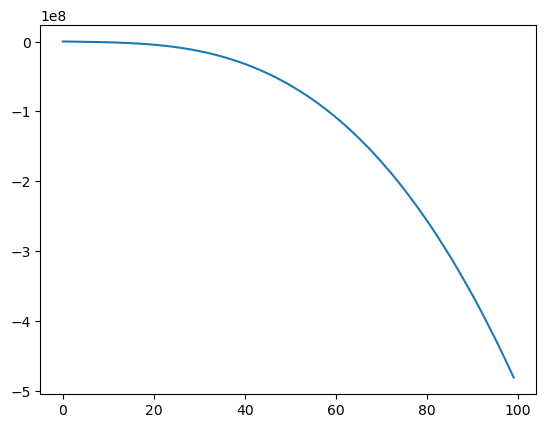

In [157]:
plot_loss(history)